# Consuming a Deployed Machine Learning Model Using Regular Code

This notebook will code a minimal client that uses Python's `requests` library to interact with a running server.

**Before going forward check that the server hosted in the URL [http://localhost:8000/](http://localhost:8000/) is still running.**

The sequence of steps/tasks to complete in this notebook are as follow:

1. Define the URL of the request
2. Use POST method to send some data to the server and get the response
3. Open the response content (i.e., resulting image) received from the server

## Import dependencies

In [1]:
import os
import io
import cv2
import requests
import numpy as np
from IPython.display import Image, display

## 1. Define the URL of the request

In [2]:
# Parameters
base_url = 'http://localhost:8000'
endpoint = '/predict'
model = 'yolov3-tiny'
confidence = 0.5

# URL of the request
full_url = base_url + endpoint + "?model=" + model
full_url

'http://localhost:8000/predict?model=yolov3-tiny'

## 2. Use POST method to send some data to the server and get the response

### Let's define `response_from_server` function that returns the response from the server:

In [3]:
def response_from_server(url, filename, confidence, verbose=True):
    """Makes a POST request to the server and returns the response.

    Args:
        url (str): URL that the request is sent to.
        filename (_io.BufferedReader): File to upload, should be an image.
        verbose (bool): True if the status of the response should be printed. False otherwise.

    Returns:
        requests.models.Response: Response from the server.
    """  
    response = requests.post(full_url, files={'file': open(f'images/{filename}', "rb")},
                        data = {'confidence':confidence})
    if verbose:
        msg = "Everything went well!" if response.status_code == 200 else "There was an error when handling the request."
        print(msg)
    return response

### Let's test it out on an example:

In [4]:
filename = "fruits.jpg"
response = response_from_server(full_url, filename, confidence=0.2)

Everything went well!


## 3. Open the resulting image received from the server
### Creating the display_image_from_response function

In [5]:
def display_image_from_response(response,filename):
    """Display image within server's response.

    Args:
        response (requests.models.Response): The response from the server after object detection.
    """
    
    image_stream = io.BytesIO(response.content)
    image_stream.seek(0)
    file_bytes = np.asarray(bytearray(image_stream.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
    cv2.imwrite(f'images_with_boxes/{filename}', image)
    display(Image(f'images_with_boxes/{filename}'))

### Let's test it out that example:

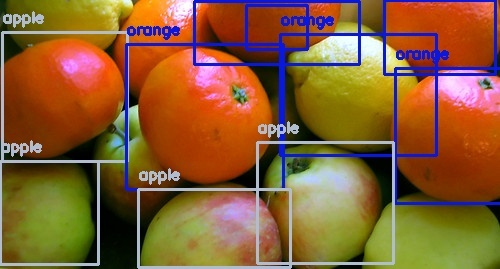

In [7]:
display_image_from_response(response,filename)

### More examples:


 Input image: images/car.jpg


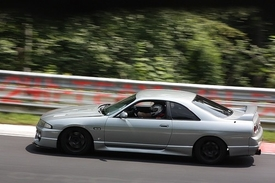


>>> Output image: images_with_boxes/car.jpg


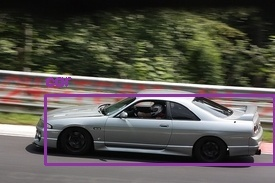


 Input image: images/apple.jpg


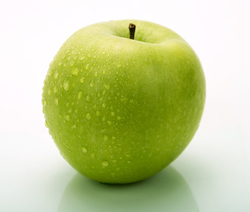


>>> Output image: images_with_boxes/apple.jpg


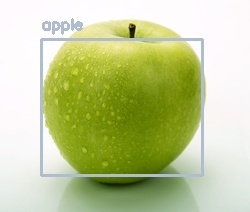


 Input image: images/oranges.jpg


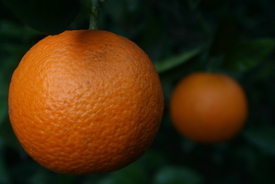


>>> Output image: images_with_boxes/oranges.jpg


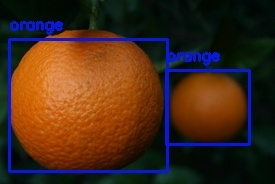


 Input image: images/fruits.jpg


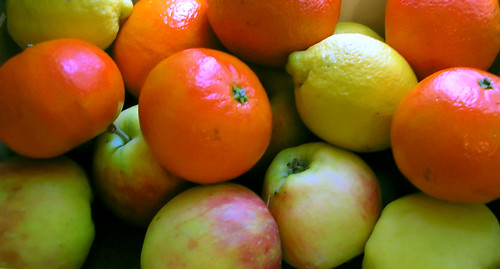


>>> Output image: images_with_boxes/fruits.jpg


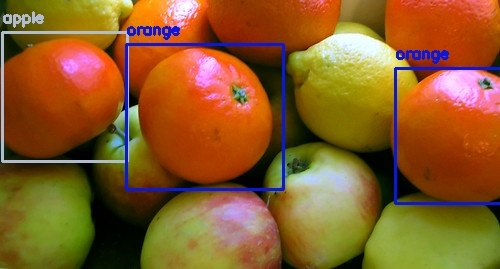

In [10]:
image_files = [
    'car.jpg',
    'apple.jpg',
    'oranges.jpg',
    'fruits.jpg'
]

for image_file in image_files:
    print(f"\n\n Input image: images/{image_file}")
    display(Image(filename=f"images/{image_file}"))
    response = response_from_server(full_url, image_file,confidence=0.4, verbose=False)
    print(f"\n>>> Output image: images_with_boxes/{image_file}")
    display_image_from_response(response,image_file)


**Congratulations on finishing this project!** Hopefully, the project served the purpose of increasing our familiarity with the process of deploying a Deep Learning model, and consuming from it.

**Keep it up! :)**